### Name: Rania Siddiqui 
### ID 07494 

# movies-1.csv and movies-2.csv

Import libraries here

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Read datasets here

In [12]:
df = pd.read_csv('movies-1.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...


In [14]:
df2 = pd.read_csv('movies-2.csv')
df2.head()

,show_id,rating,duration,listed_in,score,votes,popularity
0,s1,PG-13,90 min,Documentaries,7.4,6636,7.2
1,s2,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3
2,s3,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9
3,s4,TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0
4,s5,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4


Q1. Join datasets to include all the columns in both datasets (Hint: Find the common column to merge these datasets) <br>
Display few records after joining. **(no explanation needed)**

In [26]:
join_data = pd.merge(df,df2,on='show_id')
join_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm...",PG-13,90 min,Documentaries,7.4,6636,7.2
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t...",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,To protect his family from a powerful drug lor...,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo...",TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4


Q2. Display the number of rows/columns and data types of each column **(no explanation needed)**

In [31]:
join_data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
date_added       object
release_year      int64
description      object
rating           object
duration         object
listed_in        object
score           float64
votes             int64
popularity      float64
dtype: object

In [35]:
join_data.shape

(8810, 15)

Q3. Find and display if there are duplicates in the dataset. If yes, then in the next step, remove the duplicates and display the number of rows/columns again. **(no explanation needed)**

In [38]:
join_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8805    False
8806    False
8807     True
8808     True
8809     True
Length: 8810, dtype: bool

In [56]:
join_data = join_data.drop_duplicates()

In [58]:
rows, columns = join_data.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 8807, Columns: 15


Q4. Find all the columns with missing values by displaying the total number of missing records for each column.**(no explanation needed)**

In [61]:
missing_values = join_data.isnull().sum()
missing_values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
description        0
rating             4
duration           3
listed_in          0
score              0
votes              0
popularity         0
dtype: int64

Q5. If there are missing values in any column, replace it with value "Unknown" (except duration column). <br>
Replace "duration" column missing values with "0 mins". <br>
Display the total number of missing values again to show that there are no missing values exist. **(no explanation needed)**

In [63]:
join_data.fillna(value={'duration': '0 mins'}, inplace=True)
join_data.fillna('Unknown', inplace=True)

# Display total number of missing values in the dataframe
missing_values_count = join_data.isnull().sum()
print(missing_values_count)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
description     0
rating          0
duration        0
listed_in       0
score           0
votes           0
popularity      0
dtype: int64


Q6. Count the number of records for each rating. Do you see any issues in rating values? **Please discuss/explain your findings**

In [65]:
rating_counts = join_data['rating'].value_counts()

In [67]:
rating_counts

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [ ]:
## The above tells us that TV-MA has the highest rating which is 3207. 

Q7. Find the percentage of records released in 2018. (Hint: use column **release_year**) **(no explanation needed)**

In [70]:
total_records = len(join_data)
records_2018 = len(join_data[join_data['release_year'] == 2018])
percentage_2018 = (records_2018 / total_records) * 100

print(percentage_2018)

13.023731122970364


Q8. Split the **"duration"** column and create two new columns **"minutes"** and **"unit"** based on the duration value. Display few results. **(no explanation needed)**

In [80]:
join_data[['minutes', 'unit']] = join_data['duration'].str.split(' ', n=1, expand=True)

# Display the first few results
print(join_data[['duration', 'minutes', 'unit']].head())

    duration minutes     unit
0     90 min      90      min
1  2 Seasons       2  Seasons
2   1 Season       1   Season
3   1 Season       1   Season
4  2 Seasons       2  Seasons


In [82]:
join_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,"As her father nears the end of his life, filmm...",PG-13,90 min,Documentaries,7.4,6636,7.2,90,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,"After crossing paths at a party, a Cape Town t...",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",6.6,3180,6.3,2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,24-Sep-21,2021,To protect his family from a powerful drug lor...,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",7.0,2640,6.9,1,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,24-Sep-21,2021,"Feuds, flirtations and toilet talk go down amo...",TV-MA,1 Season,"Docuseries, Reality TV",6.7,229,7.0,1,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,In a city of coaching centers known to train I...,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9.1,71138,9.4,2,Seasons


Q9. Find the maximum duration in column **"minutes"** (Hint: check for the data type for column "minute" column and convert accordingly). **(no explanation needed)**

In [84]:
join_data['minutes'] = pd.to_numeric(join_data['minutes'], errors='coerce')

max_duration = join_data['minutes'].max()

print(max_duration)

312


Q10. Find all the records which have minutes greater than 200. Display the records and report the total number of records. **(no explanation needed)**

In [88]:
records_above_200 = join_data[join_data['minutes'] > 200]

records_above_200

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States",1-Sep-21,1984,Director Sergio Leone's sprawling crime epic f...,R,229 min,"Classic Movies, Dramas",4.2,22120,4.4,229,min
717,s718,Movie,Headspace: Unwind Your Mind,Unknown,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",Unknown,15-Jun-21,2021,"Do you want to relax, meditate or sleep deeply...",TV-G,273 min,Documentaries,7.1,155,7.3,273,min
806,s807,Movie,Seven Souls in the Skull Castle: Season Moon J...,Hidenori Inoue,"Sota Fukushi, Taichi Saotome, Shohei Miura, Ke...",Unknown,2-Jun-21,2017,"Japan, 1590. Wandering samurai band together t...",TV-14,204 min,"Action & Adventure, Dramas, International Movies",6.1,22579,5.9,204,min
807,s808,Movie,Seven Souls in the Skull Castle: Season Moon K...,Hidenori Inoue,"Mamoru Miyano, Hiroki Suzuki, Tomoki Hirose, R...",Unknown,2-Jun-21,2017,"Japan, 1590. Wandering samurai band together t...",TV-PG,212 min,"Action & Adventure, Dramas, International Movies",6.8,13945,6.9,212,min
1019,s1020,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...","India, United Kingdom",17-Apr-21,2001,"In 1890s India, an arrogant British commander ...",PG,224 min,"Dramas, International Movies, Music & Musicals",6.7,14523,6.9,224,min
2126,s2127,Movie,What's Your Raashee?,Ashutosh Gowariker,"Harman Baweja, Priyanka Chopra, Manju Singh, A...",India,15-Aug-20,2009,"To protect his family from ruin, Yogesh must m...",TV-PG,203 min,"Comedies, International Movies, Music & Musicals",6.0,13553,6.4,203,min
2483,s2484,Movie,Fifty Year Old Teenager,Fouad Al Shatti,"Abdulhussain Abdulredah, Haifaa Adel, Dawood H...",Unknown,21-May-20,1996,The life of a married 50-year-old doctor turns...,TV-14,204 min,"Comedies, International Movies",6.1,7778,6.4,204,min
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",Unknown,21-May-20,1982,A widower believes he must marry off his three...,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",6.2,24102,6.4,233,min
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,21-May-20,1979,Hoping to prevent their father from skipping t...,TV-14,237 min,"Comedies, Dramas, International Movies",6.8,15348,6.3,237,min
2488,s2489,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",Unknown,21-May-20,1984,When robberies and murders targeting women swe...,TV-14,230 min,"Comedies, Dramas, International Movies",5.6,23130,5.6,230,min


In [90]:
total_records_above_200 = len(records_above_200)
total_records_above_200

19

Q11. What is the Average (mean) minutes of records whose **type** is **Movie**? Display the average **(no explanation needed)**

In [92]:
average_movie_duration = join_data[join_data['type'] == 'Movie']['minutes'].mean()

# Display the average
print(average_movie_duration)

99.52846191485891


Q12. Which individual country has the Highest number of type TV Shows? Display the output **(no explanation needed)**

In [94]:
tv_show_counts = join_data[join_data['type'] == 'TV Show']['country'].value_counts()

# Find the country with the highest number of TV shows
highest_tv_show_country = tv_show_counts.idxmax(), tv_show_counts.max()

# Display the output
print(highest_tv_show_country)

('United States', 760)


Q13. For movie **title** '3 Idiots', what is the Show Id and Who is the Director of this show ? Display the output **(no explanation needed)**

In [96]:
movie_info = join_data[join_data['title'] == '3 Idiots'][['show_id', 'director']]

print(movie_info)

     show_id         director
1114   s1115  Rajkumar Hirani


Q14. Using Bar Graph, display the total number of movies released each year. Display only top 10 in descending order. (both types in column  **type**)<br>
In your bar graph, which year the highest number of the movies were released?

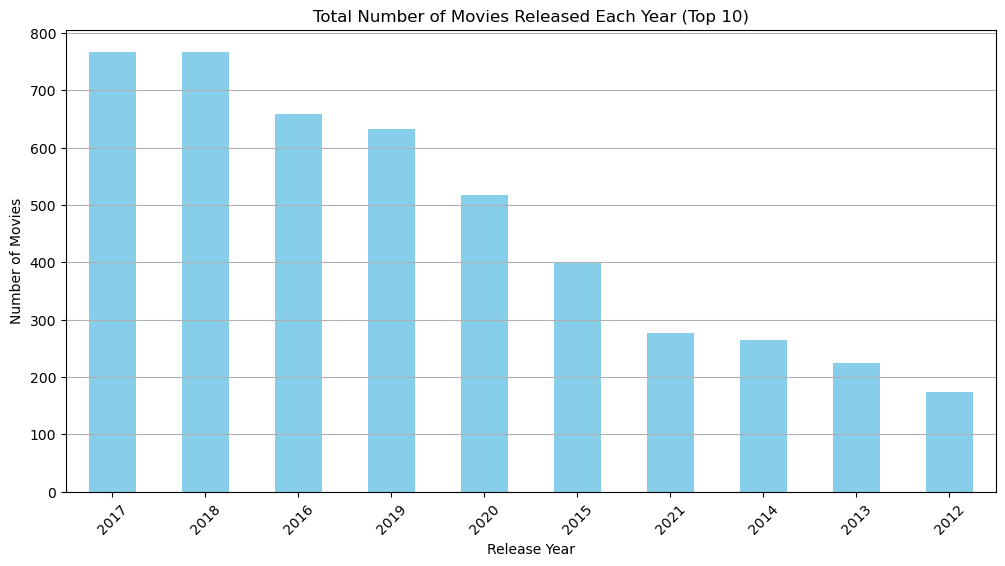

In [108]:
movies_per_year = join_data[join_data['type'] == 'Movie']['release_year'].value_counts().head(10)

# Create a bar graph
plt.figure(figsize=(12, 6))
movies_per_year.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Number of Movies Released Each Year (Top 10)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [100]:
# Year with the highest number of movies released
highest_year = movies_per_year.idxmax(), movies_per_year.max()
print(f"Year with the highest number of movies released: {highest_year[0]} with {highest_year[1]} movies.")

Year with the highest number of movies released: 2017 with 767 movies.


Q15. Display Top 5 Directors, who directed the highest number of TV Shows & Movies ? **(no explanation needed)**

In [102]:
top_directors = join_data['director'].value_counts().head(5)

# Display the output
print(top_directors)

director
Unknown                   2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Name: count, dtype: int64


Q16. In how many movies/shows, Tom Cruise was casted? Display the records **(no explanation needed)**

In [106]:
tom_cruise_records = join_data[join_data['cast'].str.contains('Tom Cruise', na=False)]


tom_cruise_records

,show_id,type,title,director,cast,country,date_added,release_year,description,rating,duration,listed_in,score,votes,popularity,minutes,unit
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,1-Aug-21,1999,"Through chance, history and divine interventio...",R,189 min,"Dramas, Independent Movies",4.3,12904,4.2,189,min
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,1-Mar-21,1988,"Motivated by money, a selfish workaholic seeki...",R,134 min,"Classic Movies, Dramas",5.8,25711,5.6,134,min


Q17. Create a distribution plot (histogram) for **ratings** TV-14 and TV-MA and **type** (Hint: use **x** for rating and **hue** for type) <br>
**(no explanation needed)**

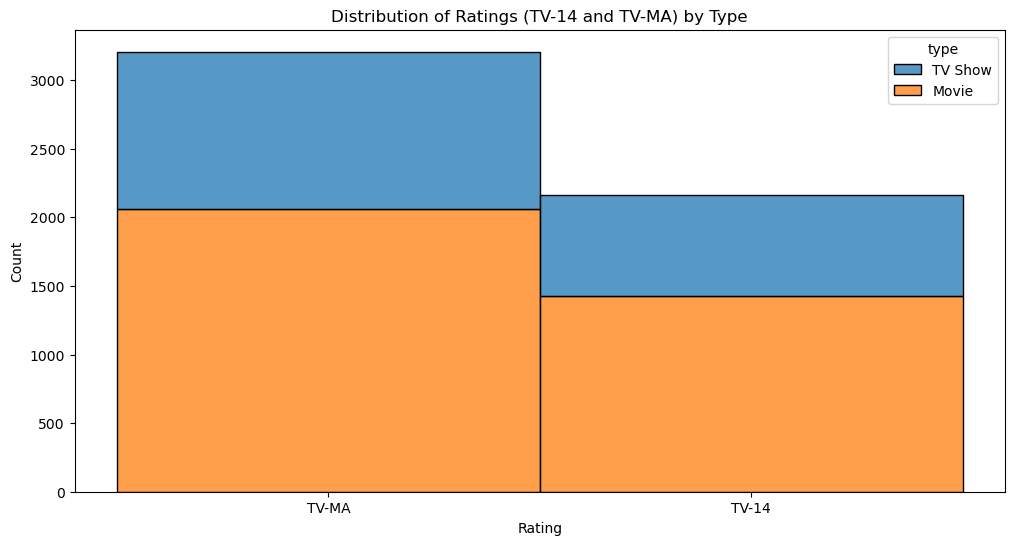

In [110]:
filtered_data = join_data[join_data['rating'].isin(['TV-14', 'TV-MA'])]

# Create a distribution plot (histogram) for ratings TV-14 and TV-MA with type as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='rating', hue='type', multiple='stack', bins=10, kde=False)
plt.title('Distribution of Ratings (TV-14 and TV-MA) by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Q18. Use a boxplot visualisation technique to see the highest, lowest and average **score** with the **type**? **Briefly explain your boxplot**

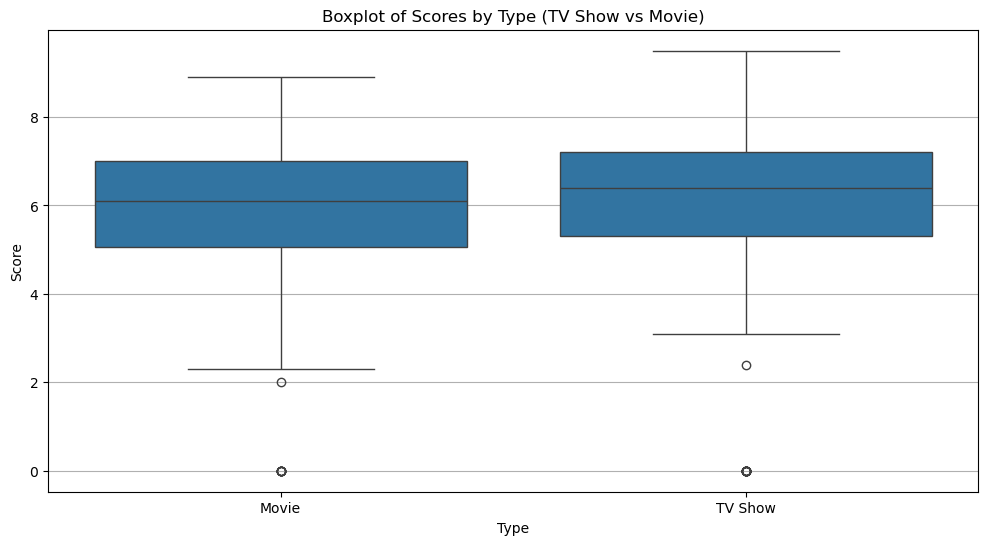

In [132]:
# Create a boxplot to visualize the distribution of 'minutes' by 'type'
plt.figure(figsize=(12, 6))
sns.boxplot(data=join_data, x='type', y='score')
plt.title('Boxplot of Scores by Type (TV Show vs Movie)')
plt.xlabel('Type')
plt.ylabel('Score')
plt.grid(axis='y')
plt.show()


### The boxplot shows that both Movies and TV Shows have a median score of about 6.5. The highest score for both is around 9, while the lowest scores drop near 2 with some extreme outliers around 0. Most scores for both types fall between 5 and 8, indicating similar score distributions.

Q19. Use any visualization technique (think of any suitable plot) which can justify/show that "As the **score** increases, the **popularity** also increases proportionally". **Explain your findings in your plot**

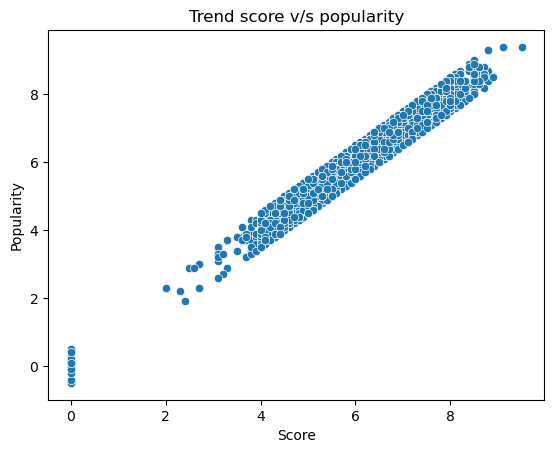

In [118]:
sns.scatterplot(x='score', y='popularity', data=join_data)
plt.title("Trend score v/s popularity")
plt.xlabel("Score")
plt.ylabel("Popularity")
plt.show()

In [ ]:
## The above scatter plot shows that as score increases, popularity also increases as well, as there is a very positive relationship between score and popularity confirming the above statement.

Q20. Generate a correlation plot between **score** and **popularity**. **Briefly explain your findings?**

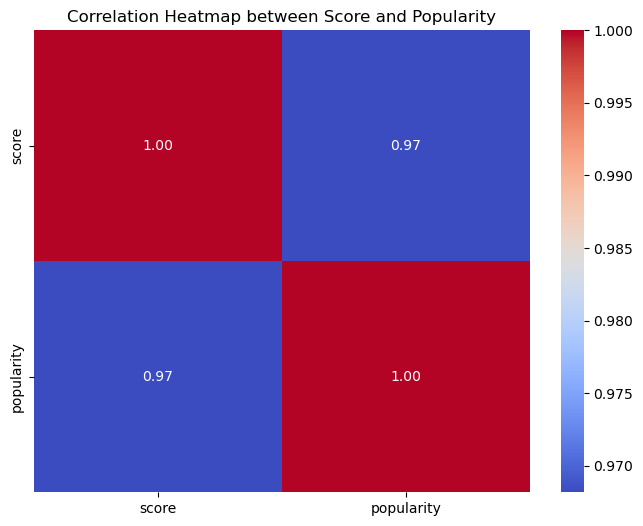

In [120]:
correlation = join_data[['score', 'popularity']].corr()

# Generate a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between Score and Popularity')
plt.show()

In [ ]:
### In the above co-relation plot it can be seen that there is a very positive co-relation between score and popularity.This shows that as score increases, popularity increases as well.

Q21. Test the Hypothesis and explain your findings: <br> H0: the score of **type** = TV Show and **type** = Movie is same (equal or similar). <br>
Ha: the score of **type** = TV Show is greater than **type** = Movie <br>
**Briefly explain your conclusion**

In [123]:
# Separate scores based on type
tv_show_scores = join_data[join_data['type'] == 'TV Show']['score']
movie_scores = join_data[join_data['type'] == 'Movie']['score']

stats.ttest_ind(tv_show_scores, movie_scores, alternative='greater')


TtestResult(statistic=7.393432583833722, pvalue=7.808967875701054e-14, df=8805.0)

In [ ]:
## As the p value < 0.05, we can reject the null hypothesis and accept the alternative hypothesis.
## So we can conclude that the score of type tv show is greater than that of movie.

Q22. Test the Hypothesis and explain your findings: <br> H0: **type** and **country** are independent and are not related to each other <br>
Ha: **type** and **country** are dependent and related to each other <br>
**Briefly explain your conclusion**

In [130]:
chisqt = pd.crosstab(df['type'],df['country'], margins=True)
stats.chi2_contingency(chisqt)

Chi2ContingencyResult(statistic=1783.5060377822952, pvalue=3.439229187319296e-07, dof=1496, expected_freq=array([[7.13623261e-01, 7.13623261e-01, 3.99629026e+01, ...,
        7.13623261e-01, 7.13623261e-01, 5.69400000e+03],
       [2.86376739e-01, 2.86376739e-01, 1.60370974e+01, ...,
        2.86376739e-01, 2.86376739e-01, 2.28500000e+03],
       [1.00000000e+00, 1.00000000e+00, 5.60000000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 7.97900000e+03]]))

In [ ]:
## As the p value < 0.05, we can reject the null hypothesis and accept the alternative hypothesis.

In [ ]:
## So we can conclude that type and country are dependent and related to each other.